In [1]:
# env: al
import pandas as pd
pd.options.display.max_columns = None

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
plt_context = 'seaborn-v0_8-whitegrid'

## Loading order reviews

In [3]:
path = './data/brazilian/olist_order_reviews_dataset.csv'
oord = pd.read_csv(path)
oord.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [4]:
oord.shape

(99224, 7)

In [5]:
# instanciando
analyser = SentimentIntensityAnalyzer()

In [6]:
def analise(texto):
    if pd.isna(texto):
        return 0
    else:
        df = analyser.polarity_scores(texto)['compound'] 
    return df

# aplicando a função e guardando na coluna new_review
oord['review_sentiment'] = oord['review_comment_message'].apply(analise)

In [7]:
# função que transforma valores maiores que 0 em positive e menores em negative
def analise2(score):
    if score == 0:
        return 'neutral'
    elif score > 0:
        return 'positive'
    else:
        return 'negative'
  
# aplicando
oord['new_sentiment'] = oord['review_sentiment'].apply(analise2)

In [8]:
oord.tail()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_sentiment,new_sentiment
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,0.0000,neutral
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,0.0000,neutral
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,0.8439,positive
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,0.0000,neutral
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49,0.0000,neutral


In [9]:
oord['new_sentiment'].value_counts()

new_sentiment
neutral     91570
negative     4649
positive     3005
Name: count, dtype: int64

## Loading customers

In [10]:
path = './data/brazilian/olist_customers_dataset.csv'
ocdd = pd.read_csv(path)
ocdd.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
ocdd['customer_zip_code_prefix'].value_counts()

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
35698      1
99370      1
64808      1
60876      1
99043      1
Name: count, Length: 14994, dtype: int64

In [12]:
ocdd['customer_city'].value_counts()

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

In [13]:
ocdd['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

## Loading orders

In [14]:
path = './data/brazilian/olist_orders_dataset.csv'
ood = pd.read_csv(path)
ood['order_purchase_timestamp'] = pd.to_datetime(ood['order_purchase_timestamp'])
ood.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
# There was just one order per client in this dataset
ood.groupby('customer_id')['order_id'].count().sort_values(ascending=False)

customer_id
00012a2ce6f8dcda20d059ce98491703    1
aa62a16b10e3fb24ecdefd7e4dc3fa65    1
aa738cdb72af39e38482fa25b992c67c    1
aa7210736aad65a84e964cfa8d64aa66    1
aa72002446dfbac0691304465c1b982d    1
                                   ..
5591abc9e7f9c644e7e7912aac65b718    1
5590e685a78102fb3ac27ecf07412750    1
558ea29f4c4dfd014345b6d3309549a2    1
558de2f6863bf7588338479d614522a3    1
ffffe8b65bbe3087b653a978c870db99    1
Name: order_id, Length: 99441, dtype: int64

In [16]:
ood.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Loading payments

In [17]:
path = './data/brazilian/olist_order_payments_dataset.csv'
oopd = pd.read_csv(path)
oopd.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Merging information

In [18]:
data = pd.merge(ood, oord, how='inner', on='order_id')
data = pd.merge(data, oopd, how='inner', on='order_id')
data = pd.merge(data, ocdd, how='inner', on='customer_id')
data = data.convert_dtypes()
data.dtypes

order_id                         string[python]
customer_id                      string[python]
order_status                     string[python]
order_purchase_timestamp         datetime64[ns]
order_approved_at                string[python]
order_delivered_carrier_date     string[python]
order_delivered_customer_date    string[python]
order_estimated_delivery_date    string[python]
review_id                        string[python]
review_score                              Int64
review_comment_title             string[python]
review_comment_message           string[python]
review_creation_date             string[python]
review_answer_timestamp          string[python]
review_sentiment                        Float64
new_sentiment                    string[python]
payment_sequential                        Int64
payment_type                     string[python]
payment_installments                      Int64
payment_value                           Float64
customer_unique_id               string[

In [19]:
data['order_purchase_yearmonth'] = data['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [20]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_sentiment,new_sentiment,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_yearmonth
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,<NA>,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,0.0,neutral,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,<NA>,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,0.0,neutral,3,voucher,1,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,<NA>,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,0.0,neutral,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,0.0,neutral,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,<NA>,<NA>,2018-08-18 00:00:00,2018-08-22 19:07:58,0.0,neutral,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08


In [21]:
data['customer_unique_id'].value_counts()

customer_unique_id
9a736b248f67d166d2fbb006bcb877c3    33
8af7ac63b2efbcbd88e5b11505e8098a    29
569aa12b73b5f7edeaa6f2a01603e381    26
1d2435aa3b858d45c707c9fc25e18779    24
90807fdb59eec2152bc977feeb6e47e7    24
                                    ..
bf908fd1af4a48bd4eb505332b9636cb     1
f08d2a2f590c97e28d4a7fc27586bb51     1
87f2a05746ef80c1387d247822075042     1
a88316db56228d4cec6935b97df4e487     1
60350aa974b26ff12caad89e55993bd6     1
Name: count, Length: 95379, dtype: Int64

## Summarizing data

In [22]:
result_df = data.groupby(['customer_unique_id', 'order_purchase_yearmonth']).agg({'payment_value': 'sum', 'review_score': ['median', 'count']})
result_df.columns = ['_'.join(col).strip() for col in result_df.columns.values]
result_df.reset_index(inplace=True)
result_df.head()

,customer_unique_id,order_purchase_yearmonth,payment_value_sum,review_score_median,review_score_count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,141.9,5.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,27.19,4.0,1
2,0000f46a3911fa3c0805444483337064,2017-03,86.22,3.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,43.62,4.0,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,196.89,5.0,1


## Checking on membership type given payments

<Axes: >

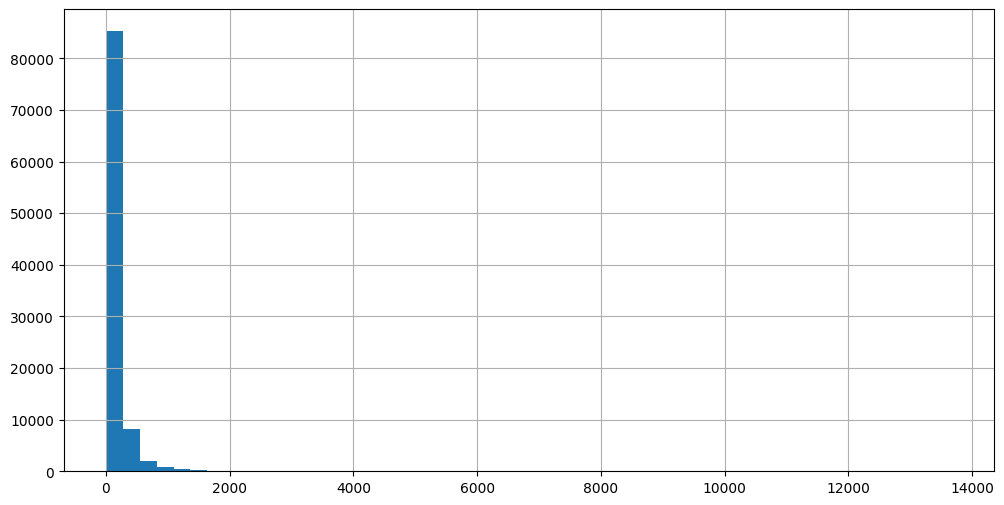

In [23]:
result_df['payment_value_sum'].hist(bins=50, figsize=(12, 6))

In [24]:
custom_labels = ['low', 'medium', 'high']
result_df['membership_type'] = pd.cut(result_df['payment_value_sum'], [0, 200, 1000, 20000], labels=custom_labels)

## Checking on satisfaction level

In [25]:
result_df['review_score_median'].value_counts().sort_index()

review_score_median
1.0    11114
1.5        5
2.0     3086
2.5       41
3.0     8023
3.5       50
4.0    18752
4.5       76
5.0    56148
Name: count, dtype: Int64

In [26]:
custom_labels = ['unsatisfied', 'neutral', 'satisfied']
result_df['satisfaction_level'] = pd.cut(result_df['review_score_median'], [0, 2, 3, 5], labels=custom_labels)
result_df['satisfaction_level'].value_counts()

satisfaction_level
satisfied      75026
unsatisfied    14205
neutral         8064
Name: count, dtype: int64

## Checking on days after last purchase

In [27]:
maxDatetime = pd.to_datetime(data['order_purchase_timestamp']).max()
timeToLastPurchase = maxDatetime - pd.to_datetime(data['order_purchase_timestamp'])
data['days_since_last_purchase'] = timeToLastPurchase.dt.days

In [28]:
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_sentiment,new_sentiment,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_yearmonth,days_since_last_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,<NA>,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,0.0,neutral,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,380
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,<NA>,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,0.0,neutral,3,voucher,1,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,380
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,<NA>,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,0.0,neutral,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,380
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,0.0,neutral,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,84
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,<NA>,<NA>,2018-08-18 00:00:00,2018-08-22 19:07:58,0.0,neutral,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103672,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5,<NA>,<NA>,2017-03-22 00:00:00,2017-03-23 11:02:08,0.0,neutral,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,587
103673,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,<NA>,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,0.0,neutral,1,credit_card,3,195.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,253
103674,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,<NA>,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,0.0,neutral,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,416
103675,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,<NA>,Foi entregue somente 1. Quero sabe

In [29]:
days_last_purchase = data.groupby(['customer_unique_id', 'order_purchase_yearmonth']).agg({'days_since_last_purchase': 'max', 'new_sentiment': 'max'}).reset_index()
result_df = result_df.merge(days_last_purchase, on=['customer_unique_id', 'order_purchase_yearmonth'], how='left')
result_df.head()

,customer_unique_id,order_purchase_yearmonth,payment_value_sum,review_score_median,review_score_count,membership_type,satisfaction_level,days_since_last_purchase,new_sentiment
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,141.9,5.0,1,low,satisfied,160,positive
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,27.19,4.0,1,low,satisfied,163,neutral
2,0000f46a3911fa3c0805444483337064,2017-03,86.22,3.0,1,low,neutral,585,neutral
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,43.62,4.0,1,low,satisfied,369,neutral
4,0004aac84e0df4da2b147fca70cf8255,2017-11,196.89,5.0,1,low,satisfied,336,neutral


In [30]:
customer_state_data = data.groupby(['customer_unique_id', 'order_purchase_yearmonth']).agg({'customer_state': 'max'}).reset_index()
result_df = result_df.merge(customer_state_data, on=['customer_unique_id', 'order_purchase_yearmonth'], how='left')
result_df.head()

,customer_unique_id,order_purchase_yearmonth,payment_value_sum,review_score_median,review_score_count,membership_type,satisfaction_level,days_since_last_purchase,new_sentiment,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,141.9,5.0,1,low,satisfied,160,positive,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,27.19,4.0,1,low,satisfied,163,neutral,SP
2,0000f46a3911fa3c0805444483337064,2017-03,86.22,3.0,1,low,neutral,585,neutral,SC
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,43.62,4.0,1,low,satisfied,369,neutral,PA
4,0004aac84e0df4da2b147fca70cf8255,2017-11,196.89,5.0,1,low,satisfied,336,neutral,SP


In [31]:
result_df_X = result_df.drop(columns=['customer_unique_id', 'order_purchase_yearmonth', 'satisfaction_level'])
result_df_X.head()

,payment_value_sum,review_score_median,review_score_count,membership_type,days_since_last_purchase,new_sentiment,customer_state
0,141.9,5.0,1,low,160,positive,SP
1,27.19,4.0,1,low,163,neutral,SP
2,86.22,3.0,1,low,585,neutral,SC
3,43.62,4.0,1,low,369,neutral,PA
4,196.89,5.0,1,low,336,neutral,SP


In [32]:
categories = ['unsatisfied', 'neutral', 'satisfied']
result_df_y = pd.Categorical(result_df['satisfaction_level'], ordered=True, categories=categories).codes
result_df_y

array([2, 2, 1, ..., 2, 2, 2], dtype=int8)

In [33]:
result_df.shape

(97295, 10)

## Preparing dataset

In [34]:
result_df_X.dtypes

payment_value_sum                  Float64
review_score_median                Float64
review_score_count                   Int64
membership_type                   category
days_since_last_purchase             int64
new_sentiment               string[python]
customer_state              string[python]
dtype: object

In [35]:
result_df_cat = pd.get_dummies(result_df_X.select_dtypes(['category', 'string'])) * 1
result_df_cat.head()

,membership_type_low,membership_type_medium,membership_type_high,new_sentiment_negative,new_sentiment_neutral,new_sentiment_positive,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
result_df_num = result_df.select_dtypes(['float64', 'int64'])
result_df_num.head()

,payment_value_sum,review_score_median,review_score_count,days_since_last_purchase
0,141.9,5.0,1,160
1,27.19,4.0,1,163
2,86.22,3.0,1,585
3,43.62,4.0,1,369
4,196.89,5.0,1,336


In [37]:
pre_df = pd.concat([result_df_cat, result_df_num], axis=1)
pre_df.head()

,membership_type_low,membership_type_medium,membership_type_high,new_sentiment_negative,new_sentiment_neutral,new_sentiment_positive,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,payment_value_sum,review_score_median,review_score_count,days_since_last_purchase
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,141.9,5.0,1,160
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,27.19,4.0,1,163
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,86.22,3.0,1,585
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,43.62,4.0,1,369
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,196.89,5.0,1,336


In [38]:
zero_counts = pre_df.eq(0).sum()
# Count the percentage of zeroes in each column
zero_percentages = (pre_df.eq(0).sum() / pre_df.shape[0]).multiply(100)

#print("Number of zeroes in each column:")
#print(zero_counts)

print("Percentage of zeroes in each column:")
print(zero_percentages.round(2))

Percentage of zeroes in each column:
membership_type_low         20.96
membership_type_medium      80.27
membership_type_high        98.77
new_sentiment_negative      95.34
new_sentiment_neutral        7.72
new_sentiment_positive      96.94
customer_state_AC           99.92
customer_state_AL           99.59
customer_state_AM           99.85
customer_state_AP           99.93
customer_state_BA           96.61
customer_state_CE           98.65
customer_state_DF           97.85
customer_state_ES           97.97
customer_state_GO           97.96
customer_state_MA           99.25
customer_state_MG           88.29
customer_state_MS           99.28
customer_state_MT           99.09
customer_state_PA           99.02
customer_state_PB           99.46
customer_state_PE           98.34
customer_state_PI            99.5
customer_state_PR           94.92
customer_state_RJ           87.16
customer_state_RN           99.51
customer_state_RO           99.74
customer_state_RR           99.95
customer_st

In [39]:
pre_df = pre_df[zero_percentages[zero_percentages < 85].index]
pre_df.head()

,membership_type_low,membership_type_medium,new_sentiment_neutral,customer_state_SP,payment_value_sum,review_score_median,review_score_count,days_since_last_purchase
0,1,0,0,1,141.9,5.0,1,160
1,1,0,1,1,27.19,4.0,1,163
2,1,0,1,0,86.22,3.0,1,585
3,1,0,1,0,43.62,4.0,1,369
4,1,0,1,1,196.89,5.0,1,336


In [40]:
pre_df.shape

(97295, 8)

In [41]:
pre_df.to_csv('df_for_al.csv', index=False)

### Saving dataframes into pickle

In [90]:
import pickle

In [91]:
file = open('dfs_for_al_.pkl','wb')
obj_1 = pre_df
obj_2 = result_df_y

pickle.dump(obj_1, file)
pickle.dump(obj_2, file)

file.close()

In [ ]:
file = open('test.pkl', 'rb')
obj_1 = pickle.load(file)
obj_2 = pickle.load(file)
obj_3 = pickle.load(file)
print(obj_1)
print(obj_2)
print(obj_3)
file.close()

## Splitting dataframes

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [43]:
sample_size_list = []

In [44]:
test_sample_ratio = 0.1

In [45]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pre_df, 
    result_df_y, 
    stratify=result_df_y, 
    test_size=test_sample_ratio, 
    random_state=42)

In [46]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (87565, 8)
Test set shape: (9730, 8)


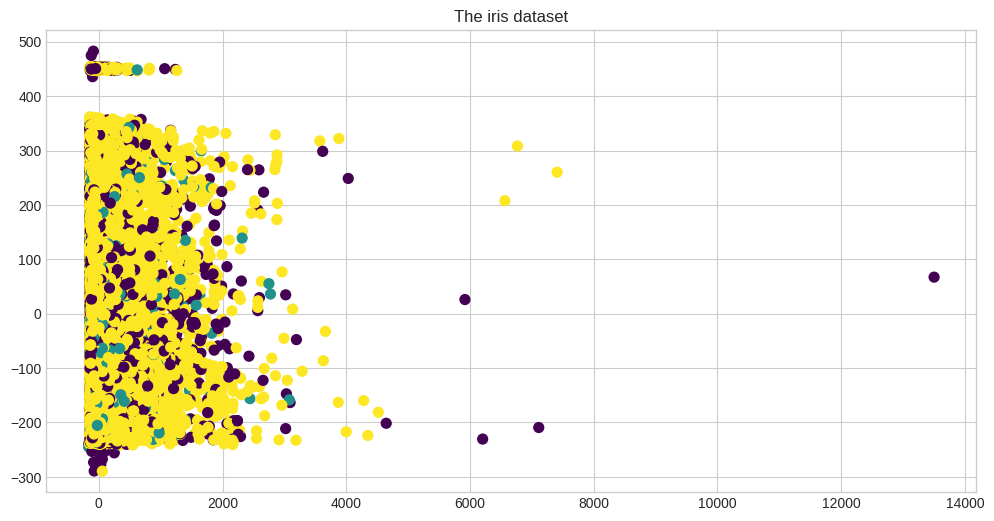

In [47]:
# visualizing the classes
#with plt.style.context('ggplot'):
with plt.style.context(plt_context):
    plt.figure(figsize=(12, 6))
    pca = PCA(n_components=2).fit_transform(X_train)
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=y_train, cmap='viridis', s=50)
    plt.title('The iris dataset')
    plt.show()

## Starting active learning

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

from modAL.models import ActiveLearner, Committee
from copy import deepcopy
import numpy as np
import matplotlib as mpl
from sklearn.metrics import confusion_matrix

In [49]:
X_train.head()

,membership_type_low,membership_type_medium,new_sentiment_neutral,customer_state_SP,payment_value_sum,review_score_median,review_score_count,days_since_last_purchase
49982,1,0,1,0,141.86,5.0,1,201
87717,1,0,1,0,44.29,5.0,1,68
96147,1,0,1,0,70.17,3.0,1,276
88358,0,1,1,0,386.95,3.0,1,327
83918,1,0,1,1,43.58,5.0,1,345


In [50]:
y_train

array([2, 2, 1, ..., 2, 2, 2], dtype=int8)

In [51]:
#X_pool = deepcopy(X_train.reset_index(drop=True))
X_pool = deepcopy(X_train.values)
y_pool = deepcopy(y_train)

In [52]:
X_pool

array([[1, 0, 1, ..., 5.0, 1, 201],
       [1, 0, 1, ..., 5.0, 1, 68],
       [1, 0, 1, ..., 3.0, 1, 276],
       ...,
       [1, 0, 1, ..., 4.0, 1, 513],
       [1, 0, 1, ..., 5.0, 1, 175],
       [1, 0, 1, ..., 4.0, 1, 347]], dtype=object)

In [53]:
y_pool

array([2, 2, 1, ..., 2, 2, 2], dtype=int8)

In [54]:
# initializing Committee members
n_members = 2
learner_list = list()

In [55]:
for member_idx in range(n_members):
    # initial training data
    n_initial = 2
    train_idx = np.random.choice(range(X_pool.shape[0]), size=n_initial, replace=False)
    X_train_new = X_pool[train_idx]
    y_train_new = y_pool[train_idx]

    # creating a reduced copy of the data with the known instances removed
    X_pool = np.delete(X_pool, train_idx, axis=0)
    y_pool = np.delete(y_pool, train_idx)

    # initializing learner
    learner = ActiveLearner(
        estimator=RandomForestClassifier(),
        X_training=X_train_new, y_training=y_train_new
    )
    learner_list.append(learner)

In [56]:
# assembling the committee
committee = Committee(learner_list=learner_list)

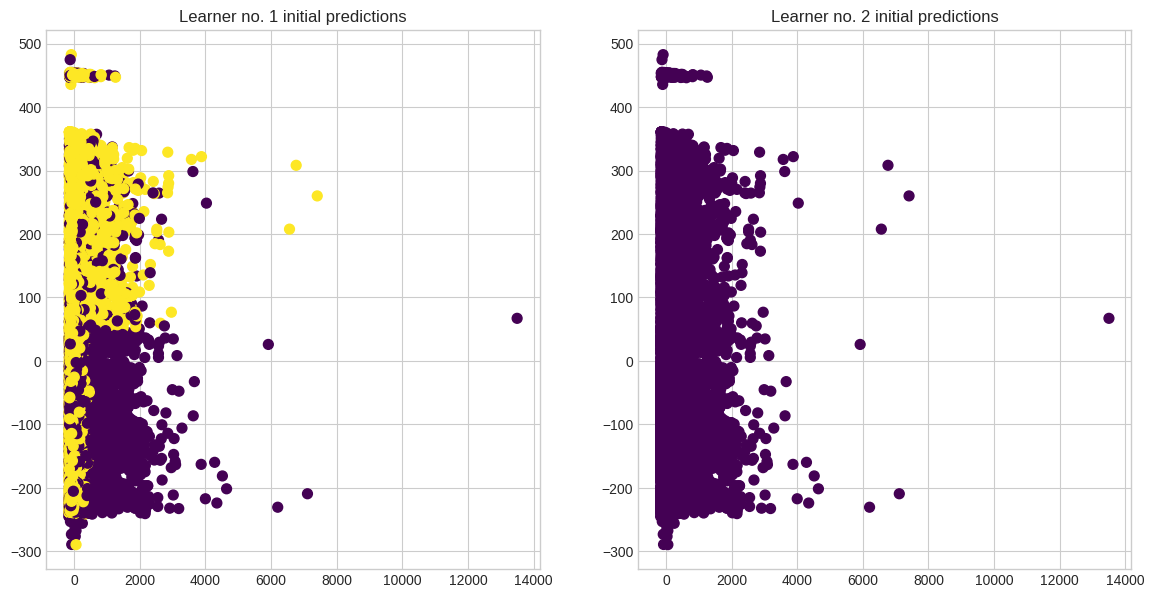

In [57]:
with plt.style.context(plt_context):
    plt.figure(figsize=(n_members*7, 7))
    for learner_idx, learner in enumerate(committee):
        plt.subplot(1, n_members, learner_idx + 1)
        plt.scatter(x=pca[:, 0], y=pca[:, 1], c=learner.predict(X_train.values), cmap='viridis', s=50)
        plt.title('Learner no. %d initial predictions' % (learner_idx + 1))
    plt.show()

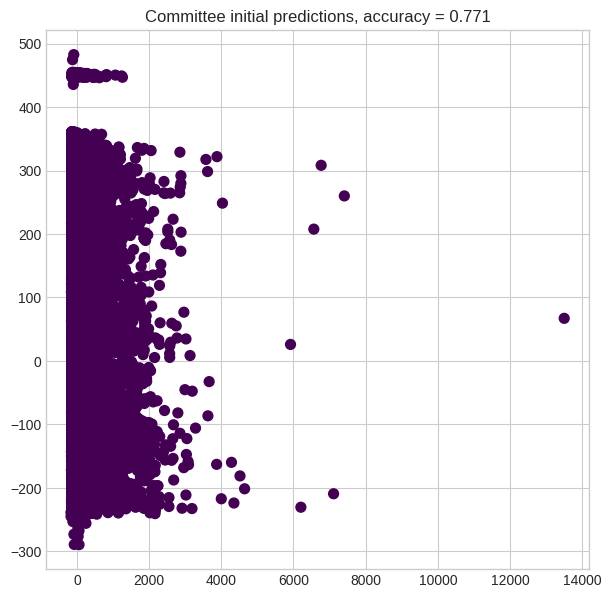

In [58]:
unqueried_score = committee.score(X_train.values, y_train)

with plt.style.context(plt_context):
    plt.figure(figsize=(7, 7))
    prediction = committee.predict(X_train.values)
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Committee initial predictions, accuracy = %1.3f' % unqueried_score)
    plt.show()

## Part 2

In [59]:
performance_history = [unqueried_score]

# query by committee
n_queries = 20
for idx in range(n_queries):
    query_idx, query_instance = committee.query(X_pool)
    committee.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
    performance_history.append(committee.score(X_train.values, y_train))
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)

## Reaching concensus

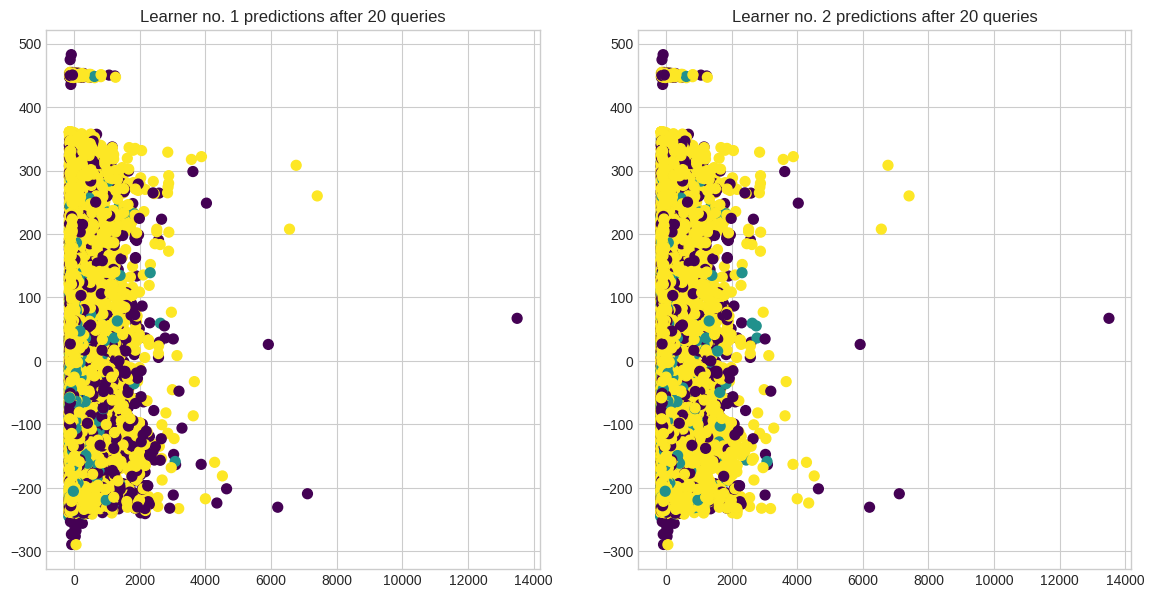

In [60]:
# visualizing the final predictions per learner
with plt.style.context(plt_context):
    plt.figure(figsize=(n_members*7, 7))
    for learner_idx, learner in enumerate(committee):
        plt.subplot(1, n_members, learner_idx + 1)
        plt.scatter(x=pca[:, 0], y=pca[:, 1], c=learner.predict(X_train.values), cmap='viridis', s=50)
        plt.title('Learner no. %d predictions after %d queries' % (learner_idx + 1, n_queries))
    plt.show()

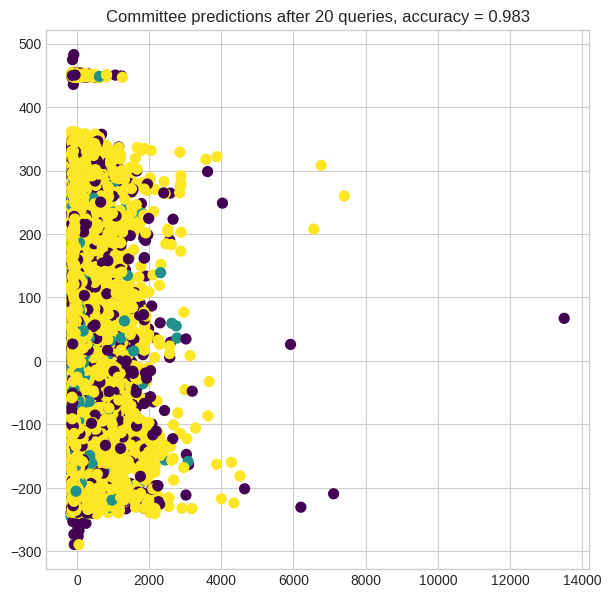

In [61]:
# visualizing the Committee's predictions
with plt.style.context(plt_context):
    plt.figure(figsize=(7, 7))
    prediction = committee.predict(X_train.values)
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Committee predictions after %d queries, accuracy = %1.3f'
              % (n_queries, committee.score(X_train.values, y_train)))
    plt.show()

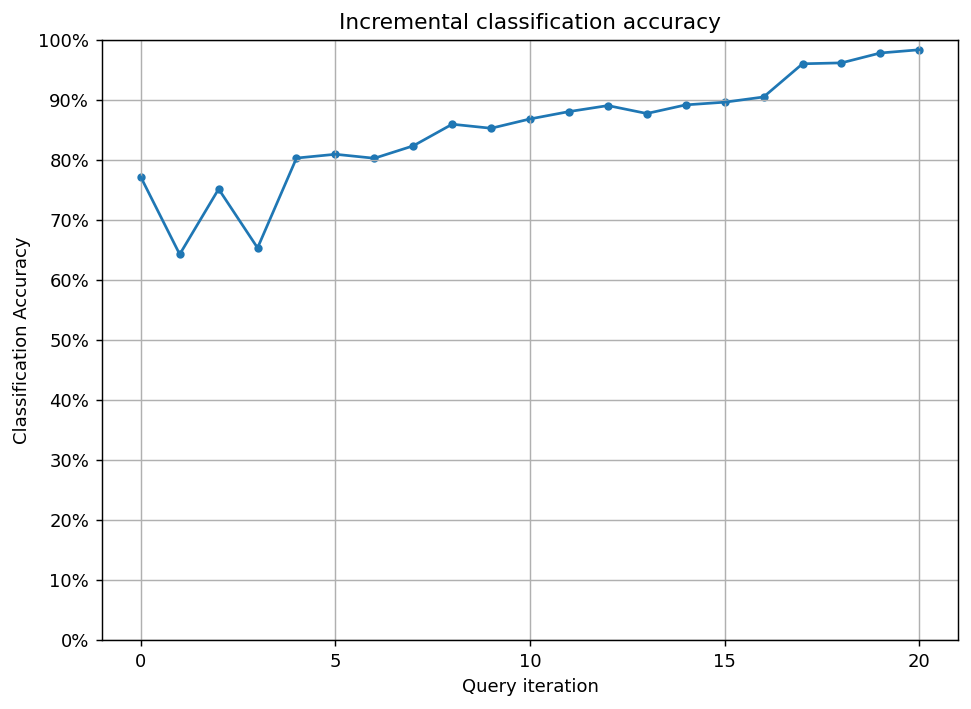

In [62]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

## Prediction from X_test

In [63]:
X_test.head()

,membership_type_low,membership_type_medium,new_sentiment_neutral,customer_state_SP,payment_value_sum,review_score_median,review_score_count,days_since_last_purchase
25397,1,0,1,0,90.88,5.0,1,363
38208,1,0,1,1,30.48,5.0,1,260
27256,1,0,1,0,66.1,3.0,1,520
1561,1,0,1,1,29.95,5.0,1,580
7608,1,0,1,0,114.56,4.0,1,310


In [64]:
X_train.columns

Index(['membership_type_low', 'membership_type_medium',
       'new_sentiment_neutral', 'customer_state_SP', 'payment_value_sum',
       'review_score_median', 'review_score_count',
       'days_since_last_purchase'],
      dtype='object')

In [65]:
prediction_xtest = committee.predict(X_test.values)
prediction_xtest

array([2, 2, 1, ..., 2, 2, 2], dtype=int8)

In [66]:
y_test

array([2, 2, 1, ..., 2, 2, 2], dtype=int8)

In [67]:
print(confusion_matrix(prediction_xtest, y_test))

[[1317   29    0]
 [ 104  748    3]
 [   0   29 7500]]


In [68]:
print(classification_report(prediction_xtest, y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1346
           1       0.93      0.87      0.90       855
           2       1.00      1.00      1.00      7529

    accuracy                           0.98      9730
   macro avg       0.95      0.95      0.95      9730
weighted avg       0.98      0.98      0.98      9730



In [69]:
res_f1_score = f1_score(prediction_xtest, y_test, average='micro')
res_f1_score

0.9830421377183967

## Checking uncertainties

In [70]:
from modAL.uncertainty import uncertainty_sampling

In [71]:
uncertainty_sampling(committee, X_test.values)
#uncertainty(X_final.values)
#.predict(X_final.values)

(array([8003]), array([0.665]))

In [72]:
probabilities = committee.predict_proba(X_test.values)
probabilities

array([[0.1  , 0.055, 0.845],
       [0.16 , 0.31 , 0.53 ],
       [0.315, 0.37 , 0.315],
       ...,
       [0.215, 0.24 , 0.545],
       [0.05 , 0.275, 0.675],
       [0.13 , 0.35 , 0.52 ]])

In [73]:
probabilities[6, :]

array([0.295, 0.415, 0.29 ])

In [74]:
probabilities.max(axis=0)

array([0.86, 0.86, 0.91])

In [75]:
# https://modal-python.readthedocs.io/en/latest/content/query_strategies/uncertainty_sampling.html
uncertain_probabilities = 1 - probabilities.max(axis=1)
uncertain_probabilities

array([0.155, 0.47 , 0.63 , ..., 0.455, 0.325, 0.48 ])

In [76]:
sorted_array = np.sort(uncertain_probabilities)[::-1]  # Sort the array in descending order
indexes = np.argsort(uncertain_probabilities)[::-1]  # Get the corresponding indexes

print("Sorted array:", sorted_array)
print("Indexes:", indexes)

Sorted array: [0.665 0.665 0.66  ... 0.095 0.095 0.09 ]
Indexes: [8003 9516 3073 ... 1578 6142 1716]


In [77]:
df_uncertainties = pd.DataFrame({'idx': indexes, 'uncertainty': sorted_array})
df_uncertainties

,idx,uncertainty
0,8003,0.665
1,9516,0.665
2,3073,0.660
3,2555,0.660
4,3273,0.660
...,...,...
9725,548,0.100
9726,4370,0.100
9727,1578,0.095
9728,6142,0.095


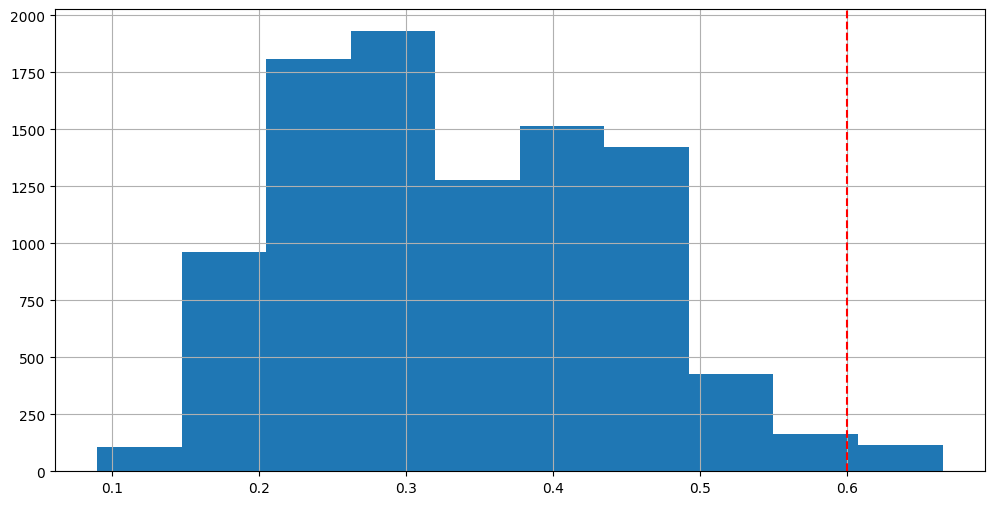

In [78]:
th = 0.6

# Create the histogram
fig, ax = plt.subplots(figsize=(12, 6))
df_uncertainties['uncertainty'].hist(ax=ax)

# Add a vertical line at a specific x-coordinate
ax.axvline(x=th, color='red', linestyle='--')

# Show the plot
plt.show()

In [79]:
df_uncertainties[df_uncertainties['uncertainty']>=th]

,idx,uncertainty
0,8003,0.665
1,9516,0.665
2,3073,0.660
3,2555,0.660
4,3273,0.660
...,...,...
129,8382,0.600
130,9671,0.600
131,4231,0.600
132,4311,0.600


## Results

In [80]:
sample_size_list.append([test_sample_ratio, X_train.shape[0], X_test.shape[0], res_f1_score])

In [81]:
sample_size_list

[[0.1, 87565, 9730, 0.9830421377183967]]

In [82]:
stats = pd.DataFrame(sample_size_list, columns = ['test_sample_ratio', 'X_train_size', 'X_test_size', 'f1_score'])

In [83]:
# import seaborn as sns

In [84]:
# sns.barplot(stats, x="test_sample_ratio", y="f1_score")

## Export model

In [85]:
import joblib

In [86]:
# Save the model to a file
model_file_path = 'committee_model.pkl'  # Specify the file path where you want to save the model
joblib.dump(committee, model_file_path)

print("Model saved successfully!")

Model saved successfully!


In [87]:
del committee

In [88]:
committee_model = joblib.load(model_file_path)

In [89]:
committee_model.predict_proba(X_test.values)

array([[0.1  , 0.055, 0.845],
       [0.16 , 0.31 , 0.53 ],
       [0.315, 0.37 , 0.315],
       ...,
       [0.215, 0.24 , 0.545],
       [0.05 , 0.275, 0.675],
       [0.13 , 0.35 , 0.52 ]])